# Visualizing Academic Performance Data with Plotnine

Objective: 
- Use the Plotnine library to analyze and visualize a dataset containing student demographic and academic performance information.

Load the Data: 
- Import a dataset (student_performance.csv) into a pandas DataFrame.
- Create a line plot to display how average scores vary across different levels of parental_level_of_education. Include appropriate labels for clarity.
- Generate a bar plot to compare the average scores of male and female students. Use color to differentiate genders in the plot.
- Use a scatter plot to visualize the relationship between math_score and reading_score. Add a regression line for better insight into the correlation.
- Create a histogram to display the distribution of average_score. Overlay a KDE plot on the histogram for a smoother representation.

In [38]:
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np
import seaborn as sns
import sklearn.datasets as datasets
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from plotnine import * 
import plotly.express as px


df = pd.read_csv('/Users/teitelbaumsair/Desktop/DI_Bootcamp/W5/D3/Cleaned_Students_Performance.csv')
df.columns

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score', 'total_score', 'average_score'],
      dtype='object')

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       1000 non-null   int64  
 1   race_ethnicity               1000 non-null   object 
 2   parental_level_of_education  1000 non-null   object 
 3   lunch                        1000 non-null   int64  
 4   test_preparation_course      1000 non-null   int64  
 5   math_score                   1000 non-null   int64  
 6   reading_score                1000 non-null   int64  
 7   writing_score                1000 non-null   int64  
 8   total_score                  1000 non-null   int64  
 9   average_score                1000 non-null   float64
dtypes: float64(1), int64(7), object(2)
memory usage: 78.3+ KB


In [40]:
df.isna().sum() # to check null values

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
total_score                    0
average_score                  0
dtype: int64

In [41]:
df.duplicated().sum() # 0

np.int64(0)

In [42]:
df.describe()

,gender,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average_score
count,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.482000,0.645000,0.358000,66.08900,69.169000,68.054000,203.312000,67.770667
std,0.499926,0.478753,0.479652,15.16308,14.600192,15.195657,42.771978,14.257326
min,0.000000,0.000000,0.000000,0.00000,17.000000,10.000000,27.000000,9.000000
25%,0.000000,0.000000,0.000000,57.00000,59.000000,57.750000,175.000000,58.333333
50%,0.000000,1.000000,0.000000,66.00000,70.000000,69.000000,205.000000,68.333333
75%,1.000000,1.000000,1.000000,77.00000,79.000000,79.000000,233.000000,77.666667
max,1.000000,1.000000,1.000000,100.00000,100.000000,100.000000,300.000000,100.000000


In [43]:
df

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average_score
0,0,group B,bachelor's degree,1,0,72,72,74,218,72.666667
1,0,group C,some college,1,1,69,90,88,247,82.333333
2,0,group B,master's degree,1,0,90,95,93,278,92.666667
3,1,group A,associate's degree,0,0,47,57,44,148,49.333333
4,1,group C,some college,1,0,76,78,75,229,76.333333
...,...,...,...,...,...,...,...,...,...,...
995,0,group E,master's degree,1,1,88,99,95,282,94.000000
996,1,group C,high school,0,0,62,55,55,172,57.333333
997,0,group C,high school,0,1,59,71,65,195,65.000000
998,0,group D,some college,1,1,68,78,77,223,74.333333


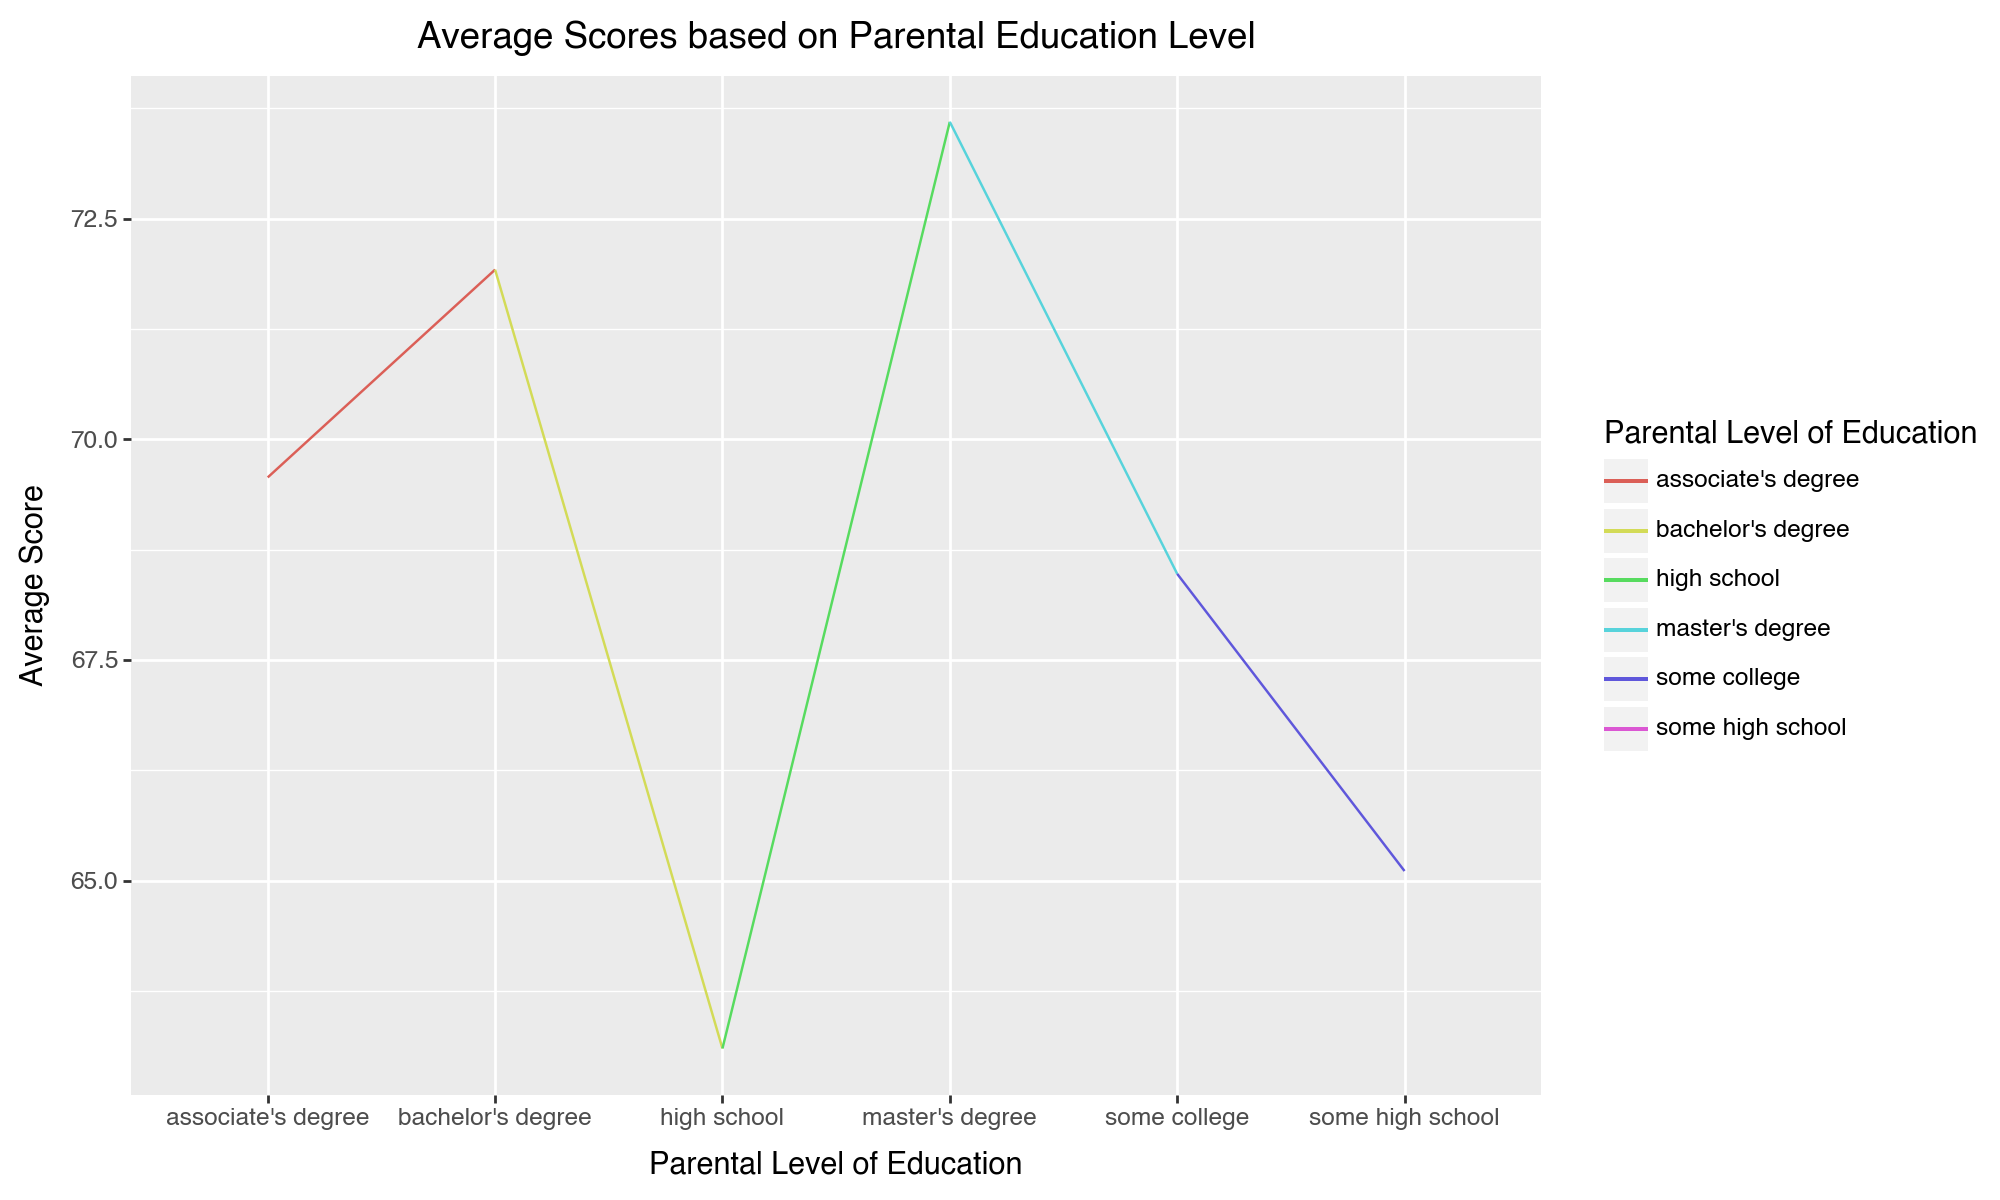

<Figure size 2000x1000 with 0 Axes>

In [56]:
# Create a line plot to display how average scores vary across different levels of parental_level_of_education.
agg_data = df.groupby('parental_level_of_education')['average_score'].mean().reset_index()

# Step 2: Plot
plt.figure(figsize=(20, 10))

plot = (
    ggplot(agg_data, aes(x='parental_level_of_education', y='average_score', color='parental_level_of_education', group=1)) +
    geom_line() +
    theme(figure_size=(10, 6)) + 
    labs(
        title="Average Scores based on Parental Education Level",
        x="Parental Level of Education",
        y="Average Score",
        color="Parental Level of Education"
    )
)

# Display the plot
plot.show()


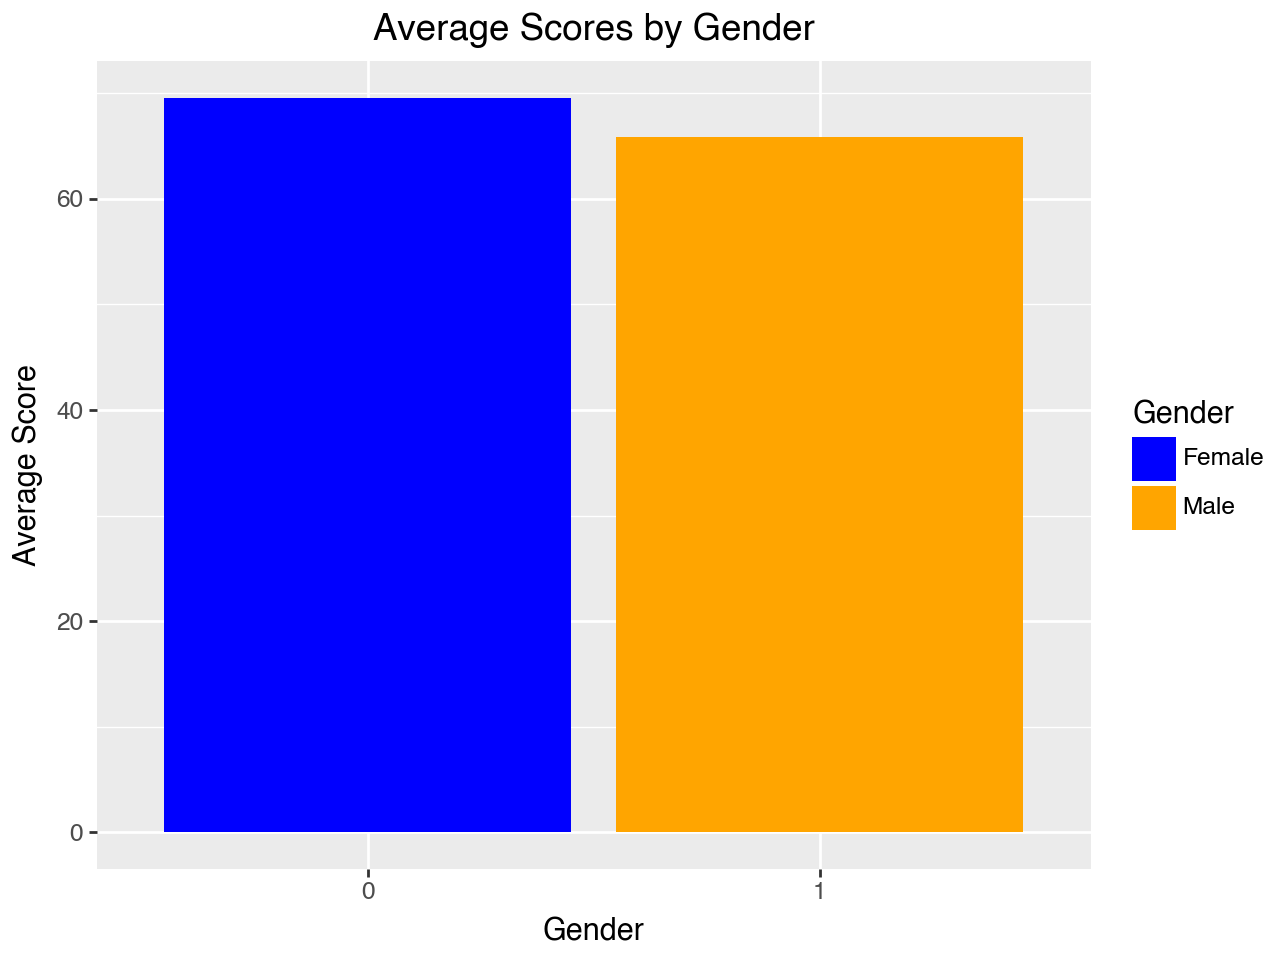

<Figure size 1000x600 with 0 Axes>

In [ ]:
# Generate a bar plot to compare the average scores of male and female students. Use color to differentiate genders in the plot.

agg_gender_data = df.groupby('gender')['average_score'].mean().reset_index()

# Step 2: Plot
plt.figure(figsize=(10, 6))

bar_plot = (
    ggplot(agg_gender_data, aes(x='factor(gender)', y='average_score', fill='factor(gender)')) +
    geom_bar(stat='identity', position='dodge') +  # Use stat='identity' to plot the actual values
    scale_fill_manual(values=['blue', 'orange'], labels=['Female', 'Male']) +
    labs(
        title='Average Scores by Gender',
        x='Gender',
        y='Average Score',
        fill='Gender'
    ))

# Display the plot
bar_plot.show()

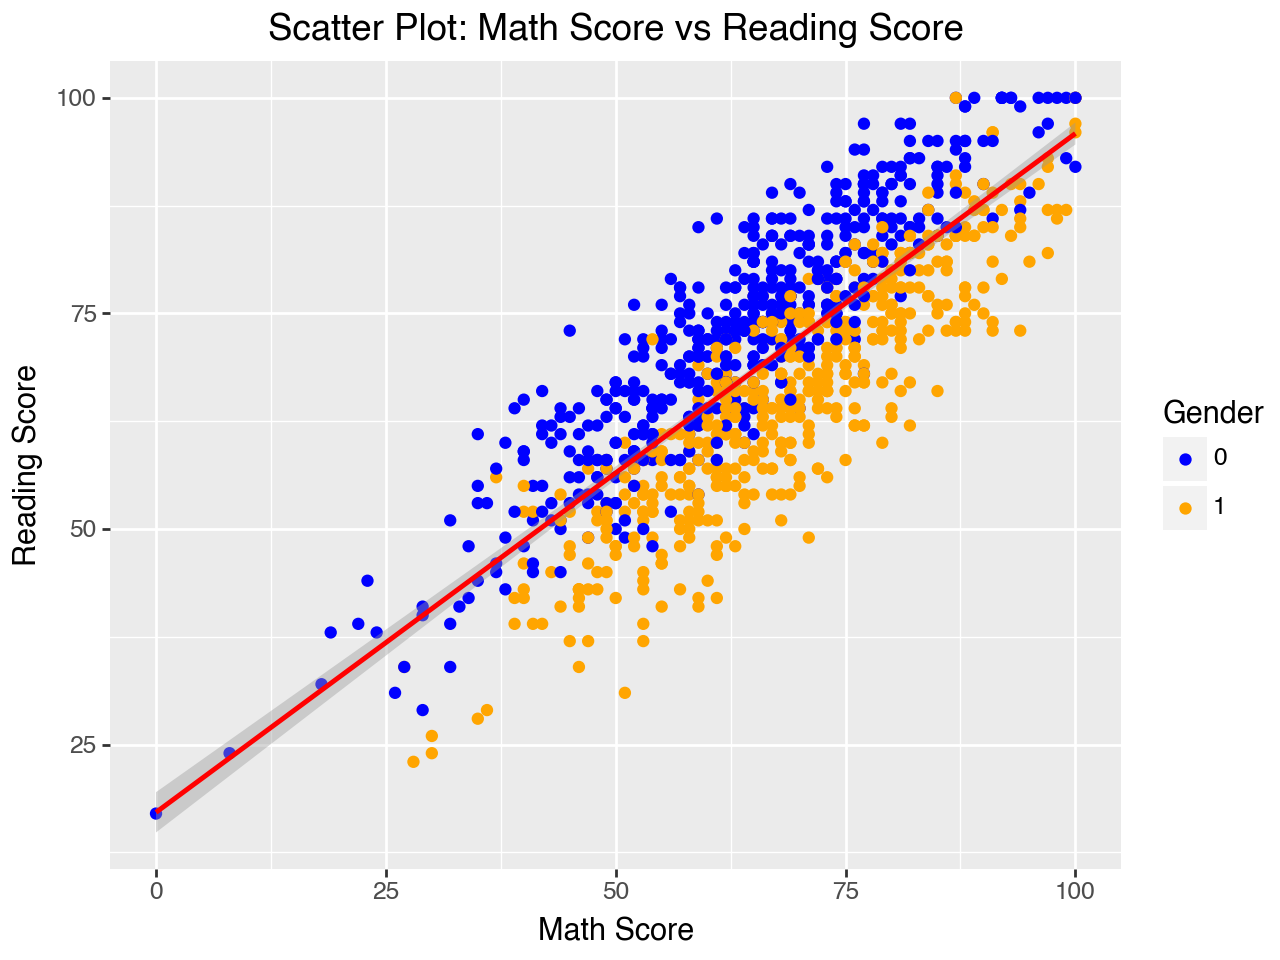

In [63]:
#Use a scatter plot to visualize the relationship between math_score and reading_score. Add a regression line for better insight into the correlation.
plot = (
    ggplot(df, aes(x='math_score', y='reading_score', color='factor(gender)')) +  # Adjusted column names
    geom_point() +  # Scatter plot
    geom_smooth(method='lm', color='red') +  # Add regression line
    labs(
        title="Scatter Plot: Math Score vs Reading Score",
        x="Math Score",
        y="Reading Score",
        color="Gender"  # Adjusted the label for the color legend
    ) +
    scale_color_manual(values=["blue", "orange"])  # Custom colors for gender (Female, Male)
)

# Display the plot
plot.show()

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/plotnine/themes/themeable.py:2426: FutureWarning: You no longer need to use subplots_adjust to make space for the legend or text around the panels. This parameter will be removed in a future version. You can still use 'plot_margin' 'panel_spacing' for your other spacing needs.


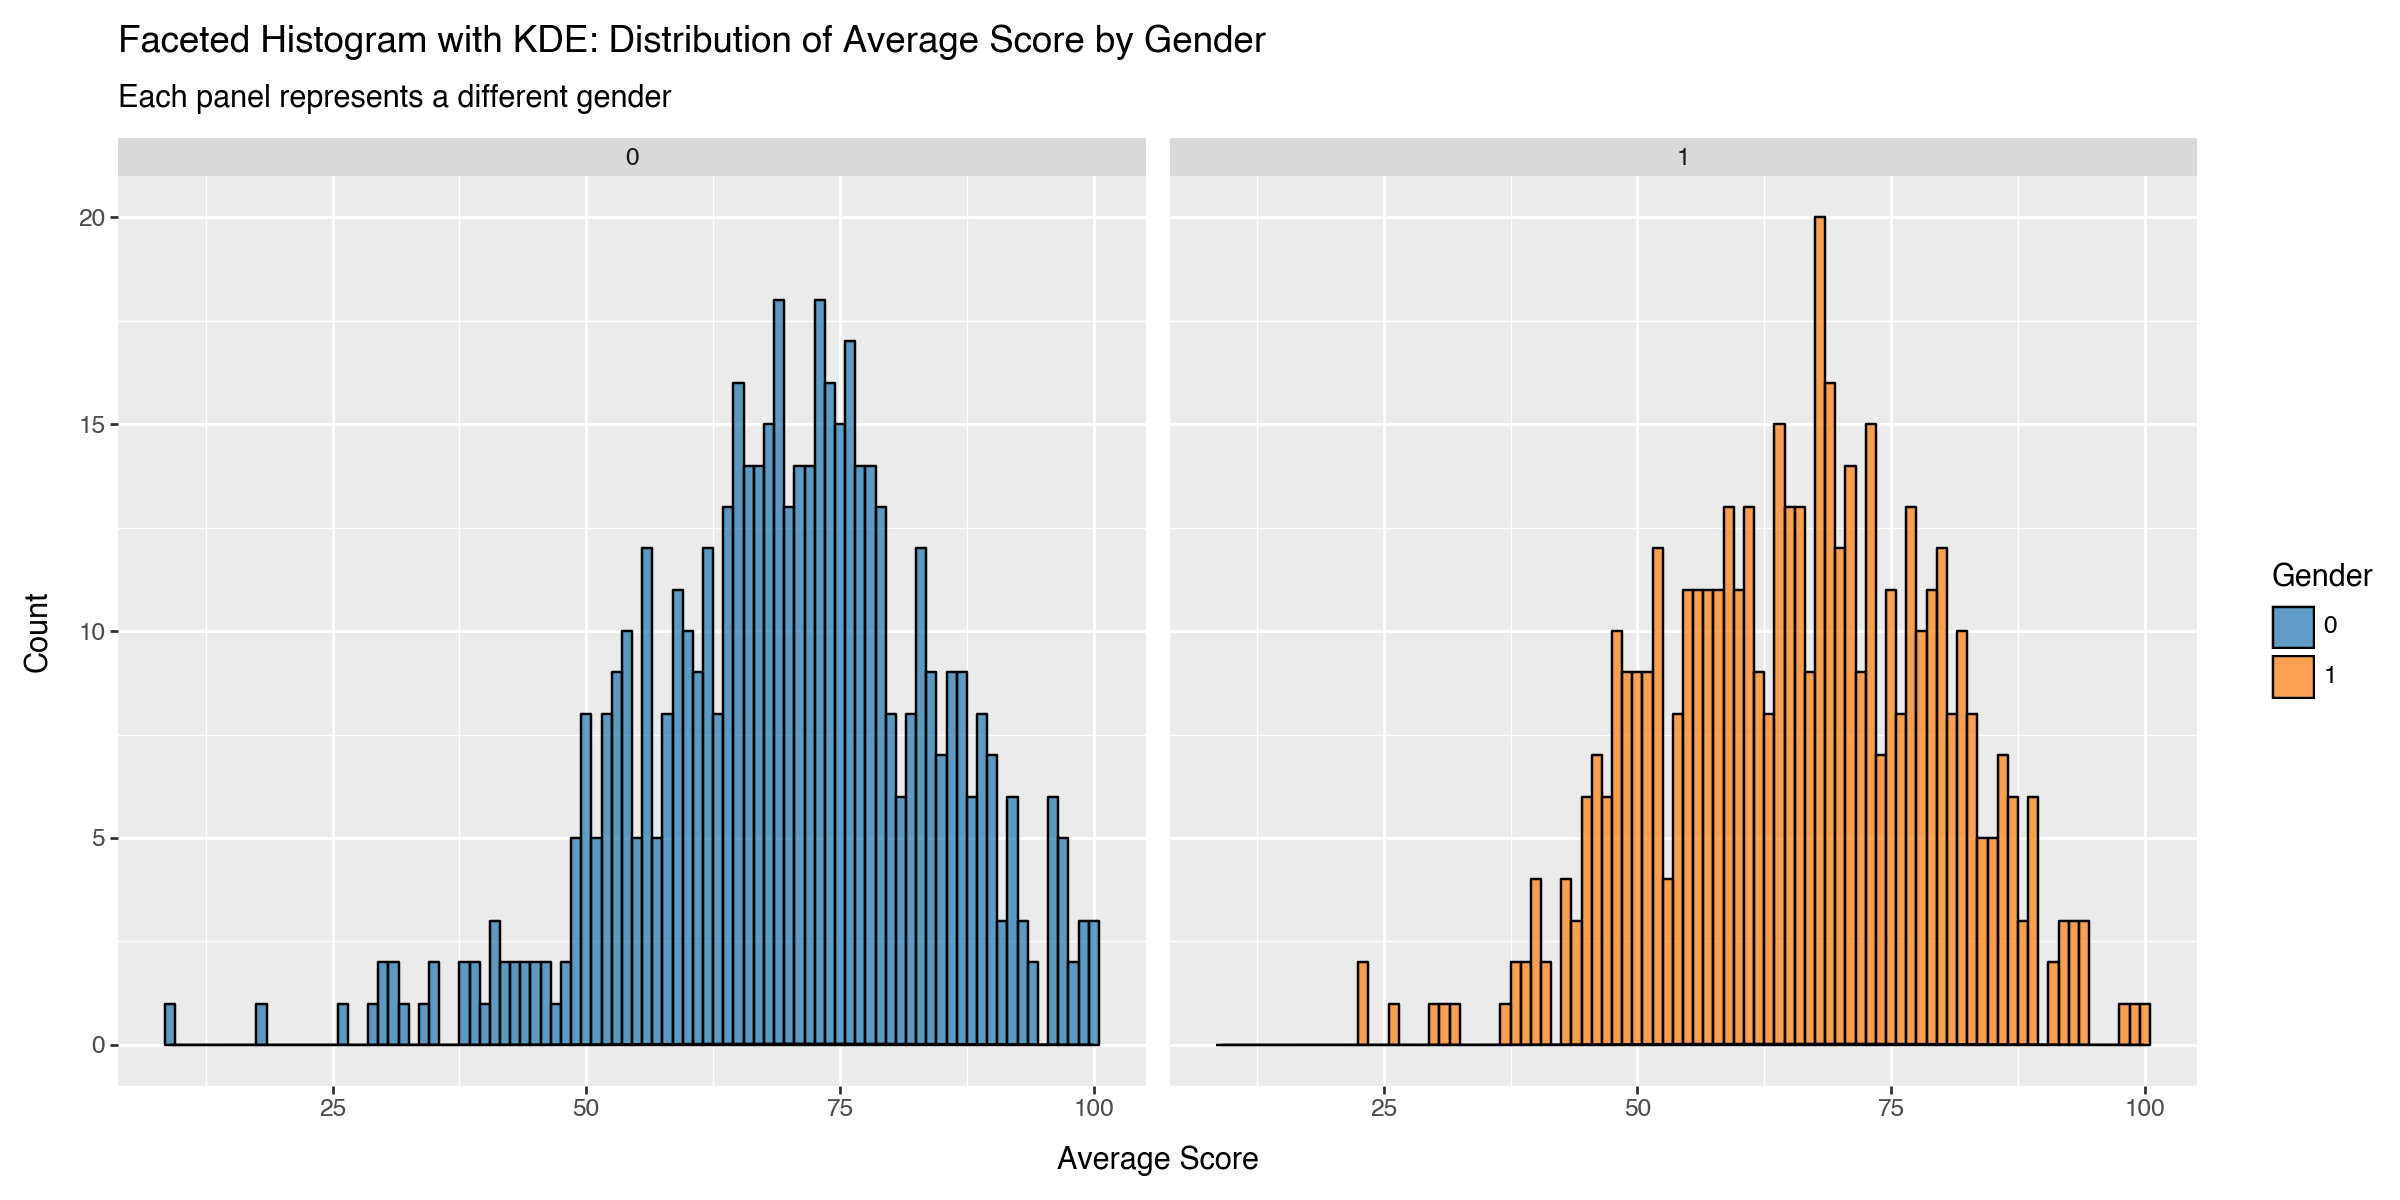

In [61]:
# Create a histogram to display the distribution of average_score. Overlay a KDE plot on the histogram for a smoother representation.

histogram_plot = (
    ggplot(df, aes(x='average_score', fill='factor(gender)')) +
    geom_histogram(binwidth=1, alpha=0.7, position='identity', color='black') +  # Histogram with a border for clarity
    geom_density(alpha=0.5, fill='green', color='black') +  # Overlay KDE plot
    facet_wrap('~gender', ncol=2) +
    theme(figure_size=(12, 6), subplots_adjust={'wspace': 0.2}) +  # Adjust figure size and spacing
    labs(
        title="Faceted Histogram with KDE: Distribution of Average Score by Gender",
        subtitle="Each panel represents a different gender",
        x="Average Score",
        y="Count",
        fill="Gender"
    ) +
    scale_fill_manual(values=["#1f77b4", "#ff7f0e"])  # Custom color for gender
)

# Display the plot
histogram_plot.show()